<a href="https://colab.research.google.com/github/paulmachau/Time-Series-Analysis---Predicting-Microsoft-Stock-Prices-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Microsoft Stock Price Prediction

$Authors$ : ```Marwa Osman, Victoria Nabea, Kennedy Juma, Grace Nekesa, Paul Machau, Josiah Okumu, Mugangasia Bravin```

![image](https://github.com/Mugangasia/Time-Series-Analysis---Predicting-Microsoft-Stock-Prices-/assets/98708792/0a8e383e-e60a-489d-a9d3-424c892d24ea)

## Project Overview
The project is aimed at analyzing and predicting Microsoft's stock prices. The aim of the project is to use predictive models ```(ARIMA, LSTM, and FB Prophet)``` to forecast Microsoft's stock prices, improve investment decision-making, optimize trading strategies, provide actionable insights, and enhance decision support tools.

The data used in the project is acquired from ```Yahoo Finance```, containing Microsoft stock market information from January ```1, 2010, to June 21, 2023.``` The dataset includes columns such as Date, Open, High, Low, Close, Volume, and Adj Close, providing insights into the stock's performance and trading activity.

The success of the project will be measured based on prediction accuracy, stability, and robustness of the models, as well as the generation of meaningful insights and interpretations regarding the factors influencing Microsoft's stock prices. Statistical measures such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) will be used to assess prediction accuracy.


# Business Understanding

#### Background    
The stock market encompasses a series of markets and exchanges wherein the buying, selling, and issuance of publicly traded company shares occur. These financial activities are conducted through institutionalized formal exchanges or over-the-counter (OTC) marketplaces, which adhere to established regulations. Within a country or region, there may exist numerous stock trading venues that facilitate transactions involving stocks and various other types of securities.    

#### Problem Statement
Misinformation and obsolete data in making analysis in the money markets across the world has been and continue to be a problem. The required information to make informed decision, at times becomes too technical for some players in the stock market industry despite the industry players craving for information to accurately make predictions. Our client, a an asset management firm, needs proper analysis on prices on Microsoft's Stock to make informed investment decisions and optimize their trading strategies as they carry out their operations as well as forecast for strategic directions and decisions.  

# Objectives

* To use predictive models  ```(ARIMA,LSTM, and FB Prophet)``` to forecast Microsoft's stock prices between (01/01/2010 - 06/21/2023). Our desired outcome is to have a model with a Mean Absolute Error of less than ```10```.

* Compare the performance of the predictive model against a baseline model(ARIMA), Mean Absolute Error ```MAE```, Root Mean Squared Error ```(RMSE)```, and Mean Absolute Percentage Error ```(MAPE)```. Aim for a significant improvement over the baseline model.

* Optimize trading strategies by incorporating predicted stock prices, specifically using the Moving Averages Bouncing strategy.

* ```Provide actionable insights:``` Extract meaningful insights from the analysis of historical stock market data and communicate them effectively to stakeholders.

* ```Enhance decision support tools:``` To create user-friendly interfaces to facilitate easy access to predictions and insights.


# Sucess Metrics

* ```Prediction Accuracy:``` The model's ability to accurately forecast Microsoft stock prices will be assessed using appropriate statistical measures such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). The lower these values, the higher the prediction accuracy.

* ```Stability and Robustness:``` The model should demonstrate stability and robustness by consistently providing accurate predictions across different time periods, including both normal and volatile market conditions.

* ```Insights and Interpretability:``` The project's success also lies in the generation of meaningful insights and interpretations regarding the factors influencing

* ```Microsoft's stock prices.```` The ability to identify key patterns and relationships can contribute to a better understanding of the stock market dynamics and aid decision-making processes.

The below code snippet starts by importing the necessary libraries for data manipulation, visualization, time series analysis, and modeling. It includes the necessary formatting and line breaks for improved readability.

# Data Understanding

The dataset used in this project contains Microsoft stock market information from 01/01/2010 through 06/21/2023. It is acquired from Yahoo Finance and consists of several columns that provide valuable insights into the stock's performance and trading activity. The key columns in the dataset are as follows:

* ```Date:``` This column represents the date in the format yy-mm-dd, indicating the trading day for which the stock information is recorded.

* ```Open:``` The "Open" column denotes the price of Microsoft stock at the market open, reflecting the initial trading price for the day.

* ```High:``` The "High" column indicates the highest price reached by Microsoft stock during the trading day, capturing the peak value achieved.

* ```Low:``` The "Low" column represents the lowest price reached by Microsoft stock during the trading day, providing insight into the minimum value observed.

* ```Close:``` The "Close" column signifies the final price of Microsoft stock at the market close, reflecting the last traded price of the day.

* ```Volume:``` The "Volume" column denotes the number of shares traded for Microsoft stock on a given trading day, indicating the level of market activity.

* ```Adj Close:``` The 'Adj Close' column refers to the adjusted closing price of a stock. It is a modified version of the closing price that takes into account various factors such as dividends, stock splits, and other corporate actions

By analyzing this dataset, we can gain a comprehensive understanding of Microsoft's stock market performance, including the opening and closing prices, the range of prices throughout the day (high and low), and the trading volume. These features are crucial for identifying patterns, trends, and factors that may influence the stock's price movements.

The dataset covers a significant time period, allowing for the exploration of long-term trends and capturing various market conditions. It provides a valuable resource for conducting time series analysis and developing predictive models to forecast future stock prices.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from prophet import Prophet
from math import ceil
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

The class below provides various data understanding functions, such as getting summary statistics, counting missing values, obtaining information about the DataFrame, getting data types, counting unique values, converting columns to datetime, setting an index, and sorting the data based on the index (date).

In [ ]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes
# Check the count of unique values for each column (excluding the time data)
    def get_unique_values(self):
        unique_values = self.df.iloc[:, 0:6].nunique()
        return unique_values

# Convert the 'Date' column to a datetime data type
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column])

# Set the specified column as the index
    def set_index(self, column):
        self.df.set_index(column, inplace=True)

# Sort the data based on the index (date) if necessary
    def sort_data(self):
        self.df.sort_index(inplace=True)

The start and end variables define the date range for the data. The symbols list contains the stock symbols you want to download. Finally, the yf.download function is used to fetch the data and store it in the df DataFrame.

In [ ]:

# Define the start and end dates for the data
start = '2010-01-01'
end = '2023-06-21'

# Define the symbols of the stocks you want to download
symbols = ['MSFT']

# Download the data using yfinance
df = yf.download(symbols, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


To display the first few rows of the DataFrame df, we use the head() method. This method allows inspecting the initial records of the DataFrame, providing a quick overview of the data.

In [ ]:
#Display first 5 rows of the data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.572372,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.579983,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.435276,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.191559,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.351505,51197400


The first line of code, resets the index of the DataFrame and brings the 'Date' column back as a regular column in the DataFrame.

The second line, sets the 'Date' column as the index of the DataFrame, replacing the existing index.

In [ ]:
# Reset the index to bring the 'Date' column on the same row as the index
df.reset_index(inplace=True)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In this code, an instance of the DataUnderstanding class is created with df as the input parameter. The du object can now be used to call various methods defined within the DataUnderstanding class to perform data exploration and analysis tasks on the DataFrame.

In [ ]:
du = DataUnderstanding(df)

To obtain information about the dataset using the get_info() method from the DataUnderstanding class

In [ ]:
# Get info about the dataset
du.get_info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3388 entries, 2010-01-04 to 2023-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3388 non-null   float64
 1   High       3388 non-null   float64
 2   Low        3388 non-null   float64
 3   Close      3388 non-null   float64
 4   Adj Close  3388 non-null   float64
 5   Volume     3388 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.3 KB


$Inference$

* The dataset contains 1511 entries and 6 columns.


In [ ]:
# checking for missing values
du.get_missing_values()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* The dataset contains 0 null values.

This code will call the get_unique_values() method on the du object, which will return the count of unique values for each column in the DataFrame. The returned unique_values object will be printed to the console, displaying the column names and their corresponding count of unique values.

The code will provide insights into the distinct values present in each column of the dataset, excluding the time data. This information is useful in understanding the distribution and variability of the data within each column.

In [ ]:
# Check the count of unique values for each column (excluding the time data)
unique_values = du.get_unique_values()
print("Unique Values:")
print(unique_values)

Unique Values:
Open         2854
High         2814
Low          2848
Close        2837
Adj Close    3205
Volume       3379
dtype: int64


The code displays the summary statistics, including count, mean, standard deviation, minimum, ```25th percentile```, median ```(50th percentile)```, ```75th percentile```, and maximum values for each numerical column in the dataset.

The summary statistics provide valuable insights into the distribution and basic characteristics of the data, enabling you to understand the central tendencies, dispersion, and range of each numerical feature in the dataset.

In [ ]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3.388000e+03
mean,106.257164,107.322875,105.162078,106.298934,101.225186,3.775717e+07
std,92.898040,93.912769,91.853438,92.937420,93.792315,2.122741e+07
min,23.090000,23.320000,22.730000,23.010000,17.686445,7.425600e+06
25%,32.182499,32.497500,31.942501,32.200001,26.531256,2.384465e+07
50%,57.789999,58.010000,57.405001,57.750000,52.515158,3.200575e+07
75%,159.412495,162.442501,157.957497,160.694996,155.630806,4.630530e+07
max,351.320007,351.470001,342.200012,348.100006,348.100006,3.193179e+08


# Exploratory Data Analysis

# Univariate Analysis

### Volume of Microsoft Stock Per Year

The code generates a plot showing the volume of Microsoft stock for each year. This visualization allows for an understanding of the trading activity and liquidity of the stock over time.

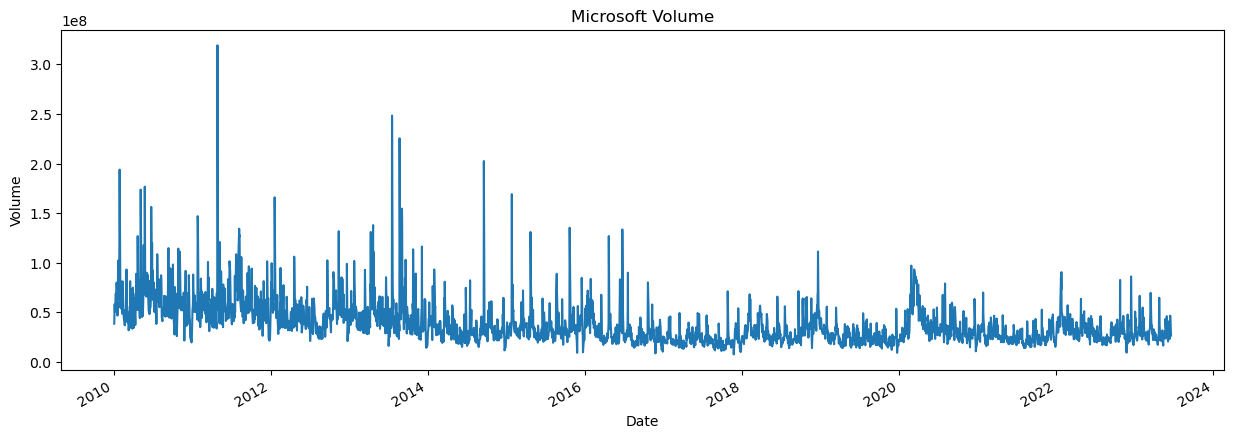

In [ ]:
def plot_volume(df):

    # Plotting the volume
    df['Volume'].plot(figsize=(15, 5))

    # Setting the title and labels for the plot
    plt.title('Microsoft Volume')
    plt.ylabel('Volume')

    # Displaying the plot
    plt.show()

# Calling the function to plot the volume
plot_volume(df)


The plot shows that the stock price fluctuated over time, with some periods of higher volatility and some periods of lower volatility.

#### Distribution of Microsoft Stock Prices

The code generates a histogram showing the distribution of closing prices. This visualization provides insights into the typical range and frequency of closing prices for Microsoft stock.

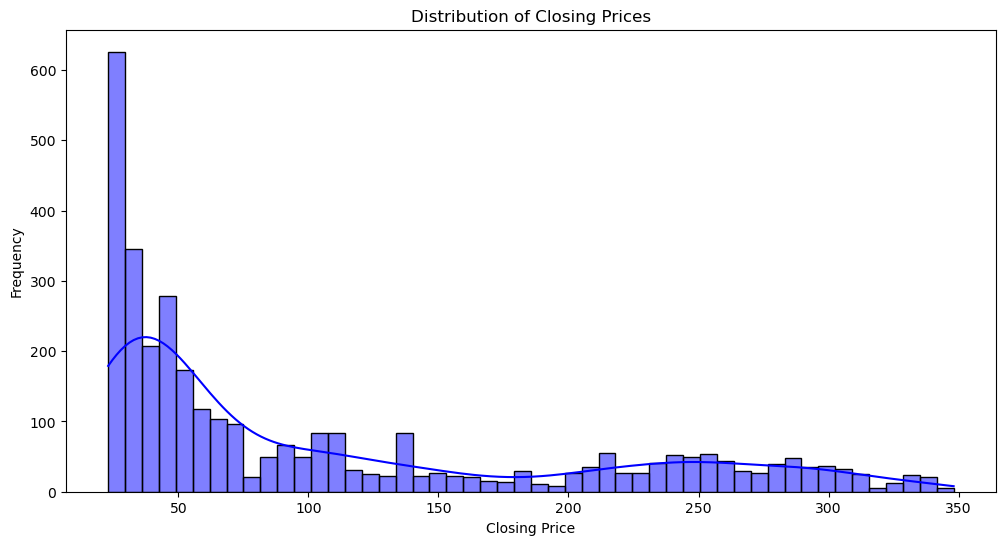

In [ ]:
def plot_closing_price_distribution(df):

    plt.figure(figsize=(12, 6))
    sns.histplot(df['Close'], kde=True, bins=50, color='blue')

    plt.title('Distribution of Closing Prices')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.show()

# Calling the function to plot the closing price distribution
plot_closing_price_distribution(df)


* The distribution of Microsoft stock prices is positively skewed, with a long tail on the right side.

* The prices are concentrated between 0 and 100, with a few outliers above 100.

# Bivariate Analysis

##### Open and Close Prices

The code generates a plot showing the open and close prices for each year. This visualization allows for a comparison of the opening and closing prices over time, providing insights into the daily price movements of Microsoft stock.

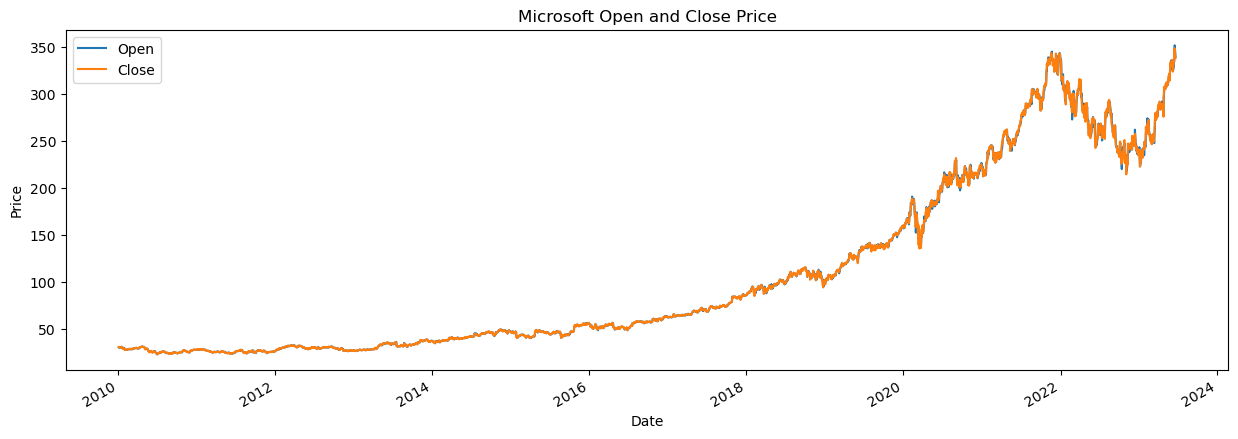

In [ ]:
# plot of all year open and close price
def plot_open_close_prices(df):
    df[['Open', 'Close']].plot(figsize=(15, 5))
    plt.title('Microsoft Open and Close Price')
    plt.ylabel('Price')
    plt.show()

plot_open_close_prices(df)

The stock price of Microsoft has been increasing over the years.

It is noticeable that the open and close prices share a similar pattern throughout the plotted period. They tend to move in tandem, rising and falling together. This synchronous behavior suggests a strong positive correlation between the opening and closing prices of Microsoft stock

#### High and Low Prices

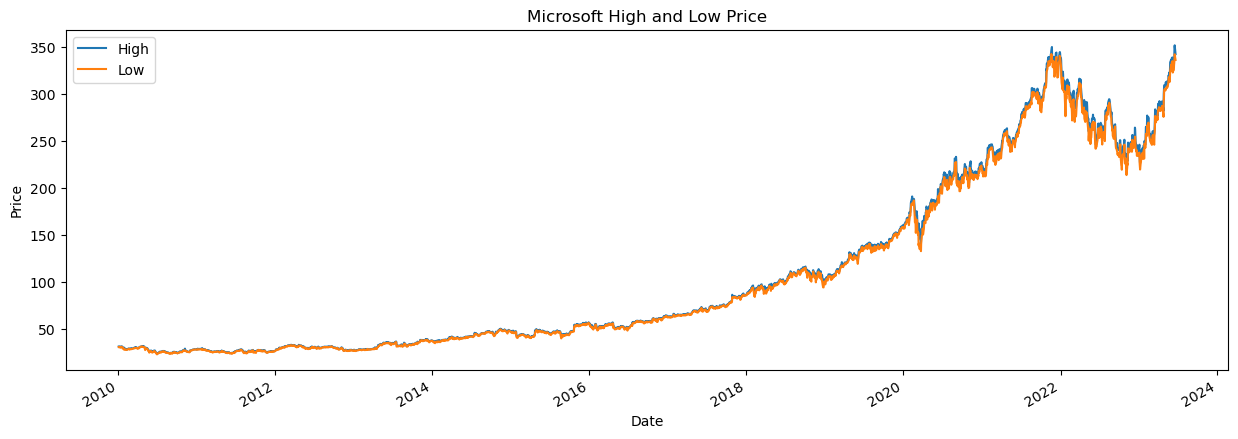

In [ ]:

def plot_high_low_prices(df):

    # Plotting the 'High' and 'Low' prices
    df[['High', 'Low']].plot(figsize=(15, 5))

    # Setting the title and labels for the plot
    plt.title('Microsoft High and Low Price')
    plt.ylabel('Price')

    # Displaying the plot
    plt.show()

# Calling the function to plot the high and low prices
plot_high_low_prices(df)


The observed graph of the high and low prices of Microsoft stock reveals an overall upward trend until 2021, followed by a significant drop in prices.
* However, by ```2022```, the high and low prices began to rise again, indicating a potential reversal and renewed buying interest.
* This pattern of price movement suggests opportunities for traders and investors to enter positions at lower prices during the drop and potentially take profits as the prices recover.

# Multivariate Analysis

#### Open, Close, High and Low Prices of Microsoft Stock

The code generates a plot showing the open and close prices for each year, along with the high and low prices. This visualization can provide insights into the price trends and volatility of the Microsoft stock over time

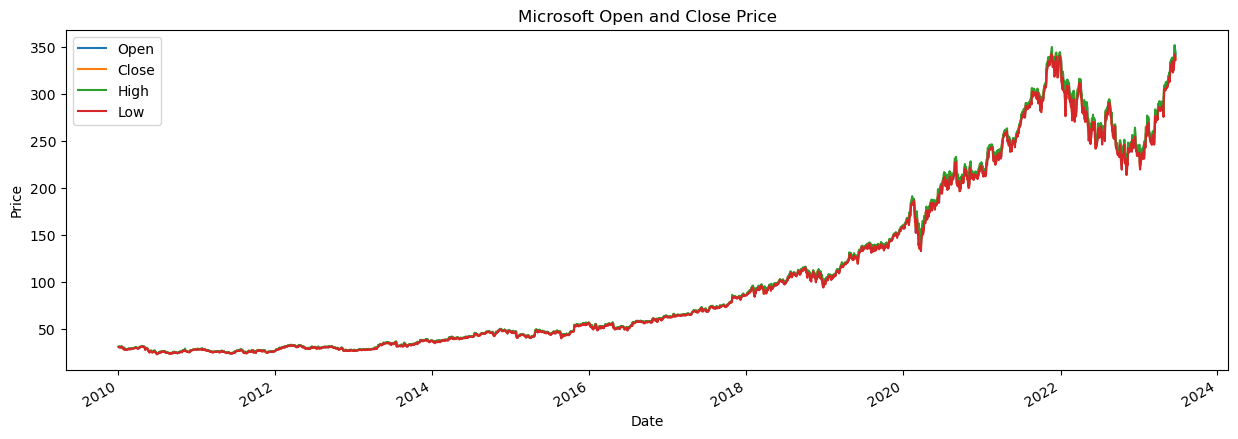

In [ ]:

def plot_open_close_prices(df):
    # Plotting the 'Open', 'Close', 'High', and 'Low' prices
    df[['Open', 'Close', 'High', 'Low']].plot(figsize=(15, 5))

    # Setting the title and labels for the plot
    plt.title('Microsoft Open and Close Price')
    plt.ylabel('Price')

    # Displaying the plot
    plt.show()

# Calling the function to plot the open and close prices
plot_open_close_prices(df)


$Inference$

* The stock price of Microsoft has been increasing over the years.

The code below resamples the data on a weekly frequency and calculate the mean of the 'Close' price, the maximum of the 'High' price, the minimum of the 'Low' price, and the sum of the 'Volume' for each week. This allows for a summarized view of the weekly trends in the stock's closing price, high and low prices, and trading volume.

In [ ]:
# resampling the data to weekly basis
weekly_analysis = df.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})
weekly_analysis.head()

,Close,High,Low,Volume
Date,,,,
2010-01-10,30.758,31.100000,30.190001,248098200
2010-01-17,30.502,31.240000,29.910000,329671600
2010-01-24,30.165,31.240000,28.840000,276516500
2010-01-31,29.166,29.920000,27.660000,505364600
2010-02-07,28.272,28.790001,27.570000,360552800


Weekly data can help identify longer-term trends and patterns while smoothing out the daily fluctuations

The code below generates a plot showing the weekly closing prices of Microsoft stock. This visualization provides insights into the trend and fluctuations of the stock's closing price on a weekly basis.

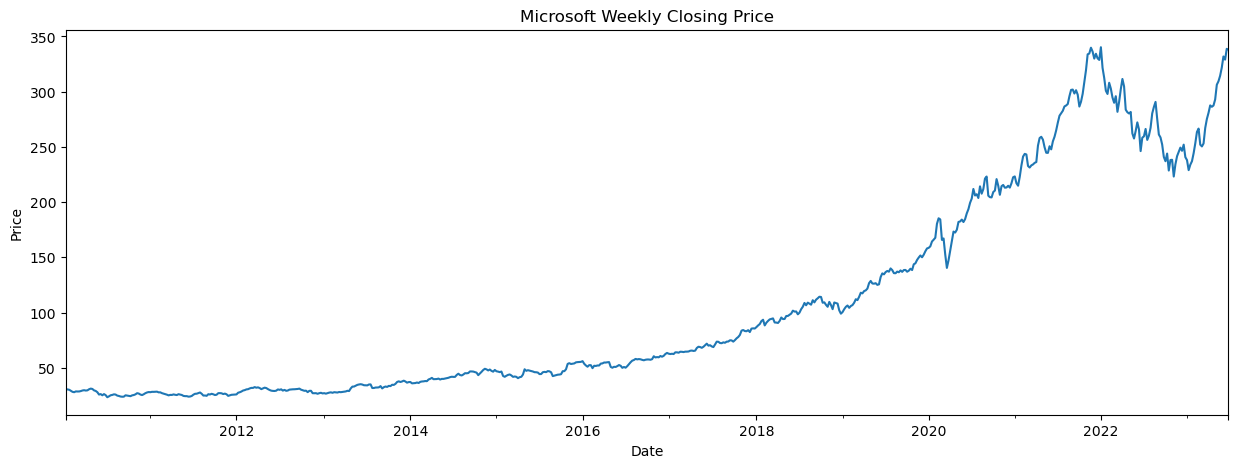

In [ ]:
import matplotlib.pyplot as plt

def plot_weekly_closing_price(weekly_analysis):

    weekly_analysis['Close'].plot(figsize=(15, 5))
    plt.title('Microsoft Weekly Closing Price')
    plt.ylabel('Price')
    plt.show()

# Calling the function to plot the weekly closing prices
plot_weekly_closing_price(weekly_analysis)


#### Daily Price Change

The code will add the 'Price_change' and 'Percent_return' columns to the DataFrame df and display the updated DataFrame showing the daily price change and percentage return for each day. This information can be used to analyze the daily performance and volatility of the stock.

In [ ]:
# Calculate the price change (difference between close and open prices) for each day
df['Price_change'] = df['Close'] - df['Open']

# Calculate the percentage return for each day
df['Percent_return'] = (df['Price_change'] / df['Close']) * 100

# Display the updated DataFrame with the new columns
df.head()


,Open,High,Low,Close,Adj Close,Volume,Price_change,Percent_return
Date,,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.572372,38409100,0.330000,1.066236
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.579983,49749600,0.109999,0.355293
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.435276,58182400,-0.109999,-0.357487
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.191559,50559700,-0.179998,-0.591128
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.351505,51197400,0.379999,1.239397


The code below calculates the price change and percentage return for each day in the DataFrame df, display the updated DataFrame, and create a line plot showing the percentage return over time. This visualization can help analyze the trend and volatility of the stock's daily returns.

In [ ]:
# Calculate the price change for each day
df['Price_change'] = df['Close'] - df['Open']
df.head()

# Calculate the percentage return for each day
df['percent_return'] = ((df['Price_change']) / df['Close']) * 100

# Create a line plot of the percentage return over time
fig = px.line(df, x=df.index, y="percent_return", title='Percent Return')
fig.show()


$Inference$

* The justification for calculating daily returns and percent returns is to measure the relative change in stock price on a daily basis. This information is valuable for understanding the volatility and performance of the stock, as well as for assessing potential trading opportunities.

* The prices volatility is low in the early years, but it has been increasing over time. This suggests that the stock has become more volatile and less stable in recent years.

* The stock price has been increasing over time, with some periods of higher volatility and some periods of lower volatility.



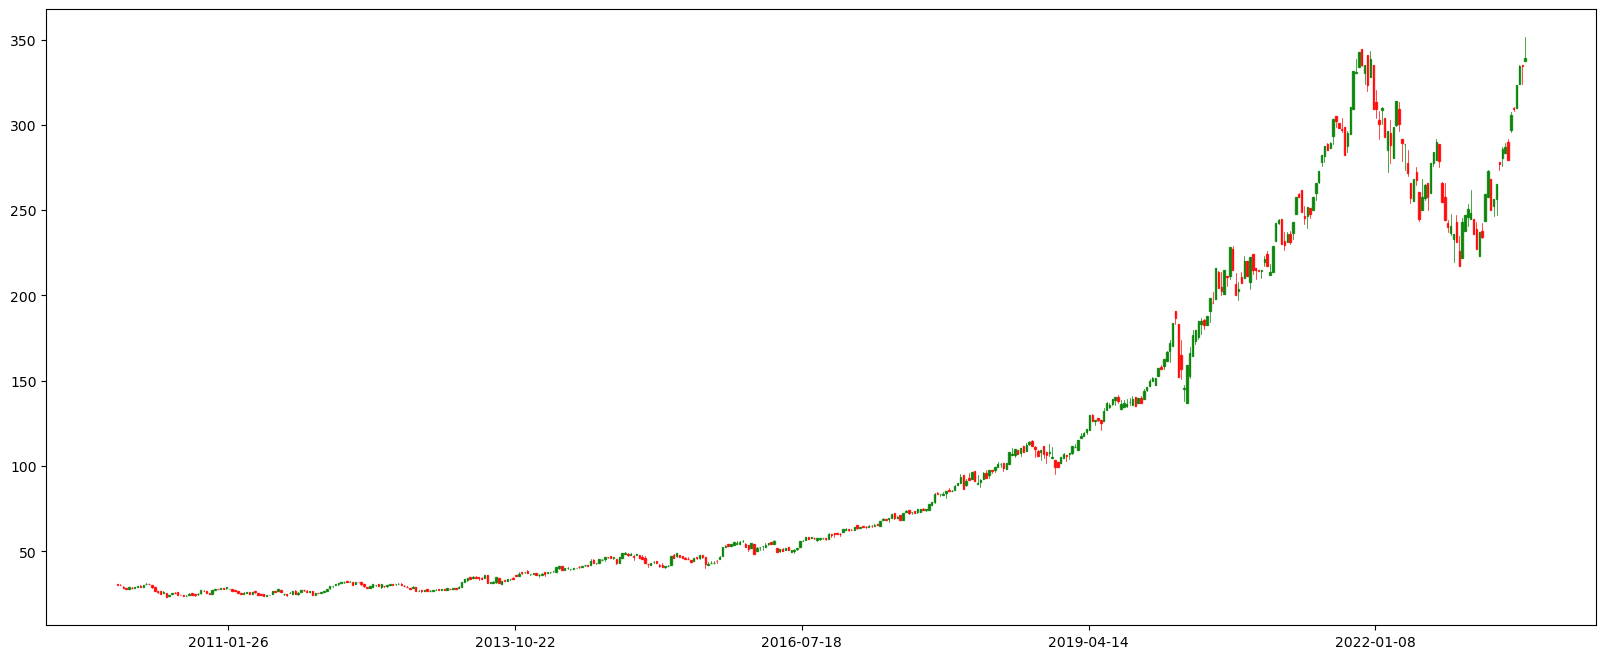

In [ ]:
# Resample data and compute OHLC values
ohlc_data = df[['Open', 'High', 'Low', 'Close']].resample('10D').ohlc().reset_index()

# Convert dates to matplotlib format
ohlc_data['Date'] = ohlc_data['Date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 8))
candlestick_ohlc(ax, ohlc_data.values, width=5, colorup='g', colordown='r', alpha=0.8)

# Format x-axis labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Format x-axis labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


$Inference$

* Red Candlestick:
* The body of the candlestick is colored red.
* The bottom of the body represents the opening price of the stock for that day.
* The top of the body represents the closing price of the stock for that day.
* The wicks or tails represent the highest and lowest prices reached during the trading day.
* A red candlestick indicates that the closing price is lower than the opening price, suggesting a bearish movement or negative sentiment for Microsoft stock.

The code below generates a candlestick chart that visualizes the OHLC values for each resampled period, providing insights into the price trends and volatility over time.

# Moving Averages

The code below calculates the moving averages for different window sizes and plot them along with the original closing prices. This plot can be used to visualize the trend and smoothness of the data over time, helping in identifying potential support and resistance levels.

The plot helps visualize the trend and smooth out the price fluctuations in the stock or financial data. The moving averages provide an indication of the average price over a specified time period, allowing traders and analysts to identify trends and potential areas of support and resistance in the price movements.

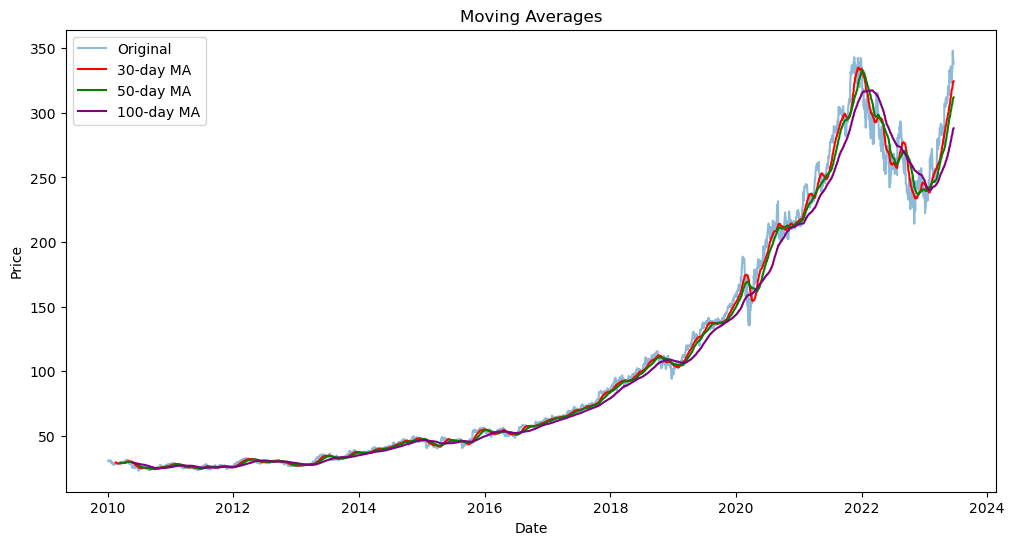

In [ ]:


# Compute moving averages for 30, 50, and 100 days
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
df['50_day_MA'] = df['Close'].rolling(window=50).mean()
df['100_day_MA'] = df['Close'].rolling(window=100).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original', alpha=0.5)
plt.plot(df['30_day_MA'], label='30-day MA', color='r')
plt.plot(df['50_day_MA'], label='50-day MA', color='g')
plt.plot(df['100_day_MA'], label='100-day MA', color='purple')
plt.legend(loc='best')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

$Inference$

* The 30 day Moving Average of the daily price change is positive, indicating an upward trend in the stock price.
* The 50 day Moving Average of the daily price change is positive, indicating an upward trend in the stock price.
* The 100 day Moving Average of the daily price change is positive, indicating an upward trend in the stock price.

The code below generates pair plot and correlation heatmap which provide valuable insights into the relationships and correlations present in the data, aiding in the analysis and understanding of the dataset.

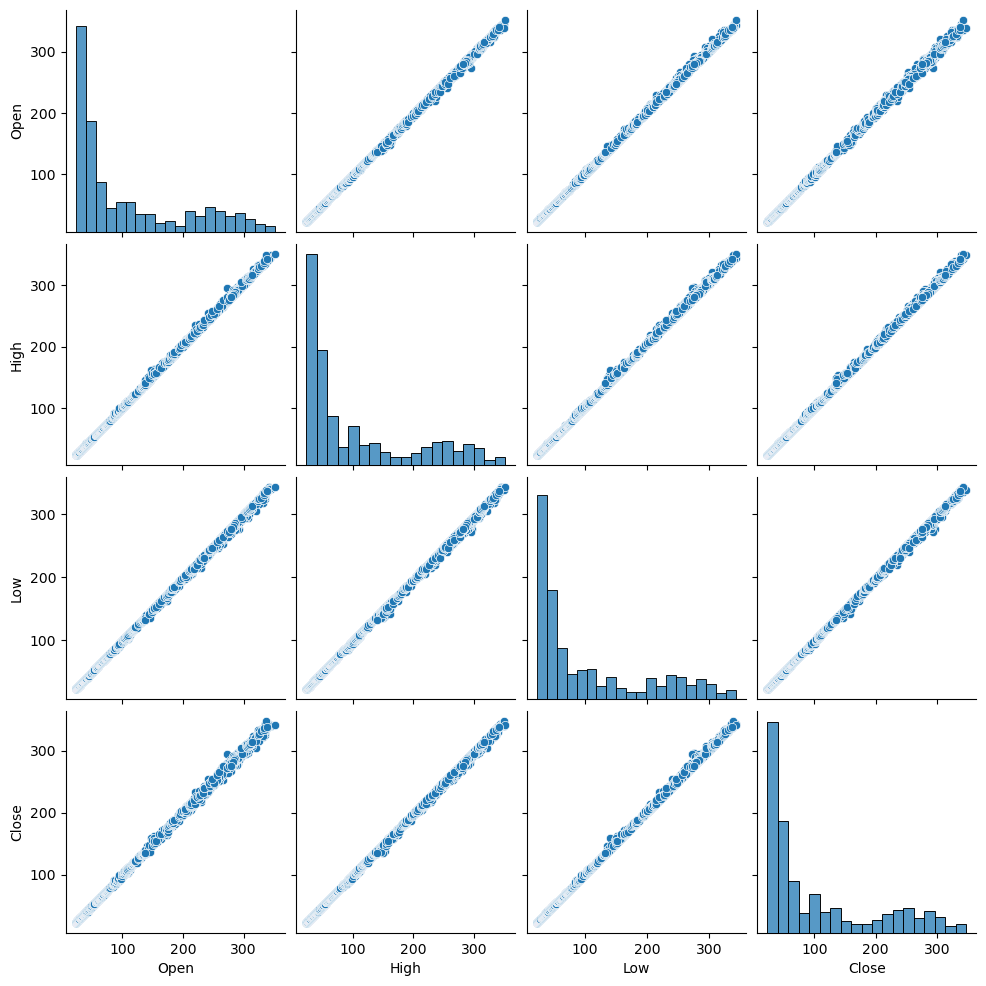

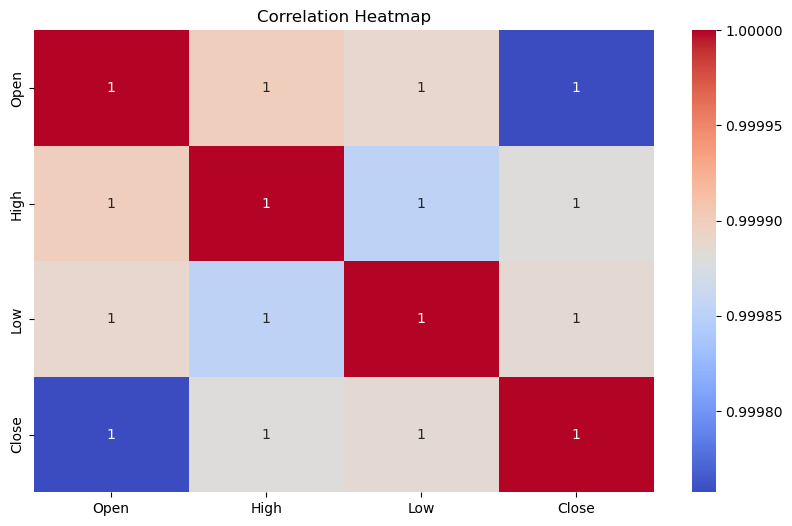

In [ ]:
def plot_pairplot(df, columns):

    sns.pairplot(df[columns])
    plt.show()

def plot_correlation_heatmap(df, columns):

    plt.figure(figsize=(10, 6))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Specify the columns for pair plot and correlation heatmap
columns_for_pairplot = ['Open', 'High', 'Low', 'Close']
columns_for_heatmap = ['Open', 'High', 'Low', 'Close']

# Call the functions to generate the visualizations
plot_pairplot(df, columns_for_pairplot)
plot_correlation_heatmap(df, columns_for_heatmap)


$Inferences$

$.$ The varaibles have perfect positive correlation between them.

$.$ There is a linear relationship where the variables move in the same direction with a constant proportionality. This means that as one variable increases, the other variable also increases by a fixed amount.

# Data Preparation

### Checking for Stationarity

By computing the rolling mean and rolling standard deviation, this code aims to assess the stationarity of the 'Close' values in the DataFrame. Stationarity refers to the property of a time series where its statistical properties such as mean and variance remain constant over time. The rolling mean and standard deviation can help identify trends or patterns in the data and provide insights into its stationarity.

In [ ]:
# Checking for Stationarity

rolmean = df['Close'].rolling(window=12).mean()
rolstd = df['Close'].rolling(window=12).std()

print(rolmean, rolstd)

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-06-13    330.971670
2023-06-14    331.342501
2023-06-15    332.750003
2023-06-16    333.911667
2023-06-20    334.367500
Name: Close, Length: 3388, dtype: float64 Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2023-06-13    4.091493
2023-06-14    4.465716
2023-06-15    6.580912
2023-06-16    6.960705
2023-06-20    7.044175
Name: Close, Length: 3388, dtype: float64


By calling the plot_rolling_statistics function with the DataFrame df and a window size of 30, the code generates a plot showing the original 'Close' values, the rolling mean, and the rolling standard deviation. This plot can help in visualizing the trends and fluctuations in the data and assessing its stationarity.

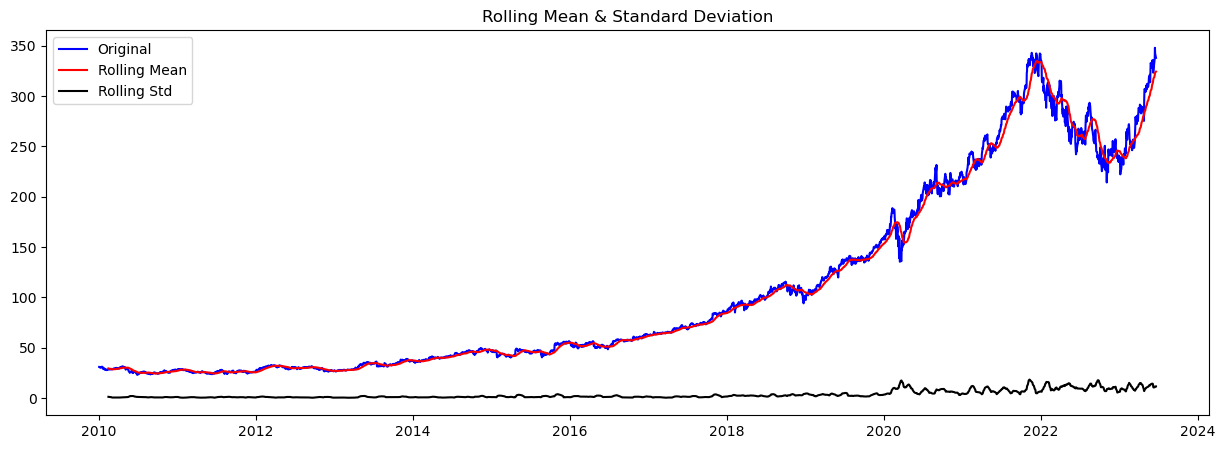

In [ ]:
# Plot rolling statistics:
def plot_rolling_statistics(df, window):
    plt.figure(figsize=(15, 5))
    orig = plt.plot(df['Close'], color='blue', label='Original')
    rolmean = df['Close'].rolling(window=window).mean()
    rolstd = df['Close'].rolling(window=window).std()
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

# Define the window size for rolling calculations
window_size = 30

# Call the function to plot rolling statistics
plot_rolling_statistics(df, window_size)

$Inference$

* The data is non stationary because the original Close values, Rolling mean are not constant over time

# Dickey-Fuller Test

 The Dickey-Fuller test helps in assessing the stationarity of the 'Close' time series data. The test statistic, p-value, and critical values can provide insights into the presence of trends and seasonality in the data.

In [ ]:
# Perform Dickey-Fuller test:

print('Results of Dickey-Fuller Test:')

dftest = adfuller(df['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)


Results of Dickey-Fuller Test:


Test Statistic                    1.676034
p-value                           0.998069
#Lags Used                       26.000000
Number of Observations Used    3361.000000
Critical Value (1%)              -3.432297
Critical Value (5%)              -2.862400
Critical Value (10%)             -2.567228
dtype: float64


$Inference$

* The Dickey-Fuller test results indicate that the time series data is likely non-stationary.
* This is supported by a positive test statistic, a high p-value compared to the significance level, and a test statistic exceeding critical values at all significance levels.
* Non-stationary data suggests the presence of trends, seasonality, or other patterns that need to be considered when making predictions or conducting analyses

### Log Transformation of the Target Variable $Close$

The code will plot the log scale of the closing price on a graph. The x-axis represents the date, and the y-axis represents the logarithmic value of the closing price. The plot will show the trend and fluctuations in the log scale of the closing price over time. This visualization helps in analyzing the growth or decline patterns of the closing price in a logarithmic scale, which can provide insights into the underlying trends and volatility of the stock.

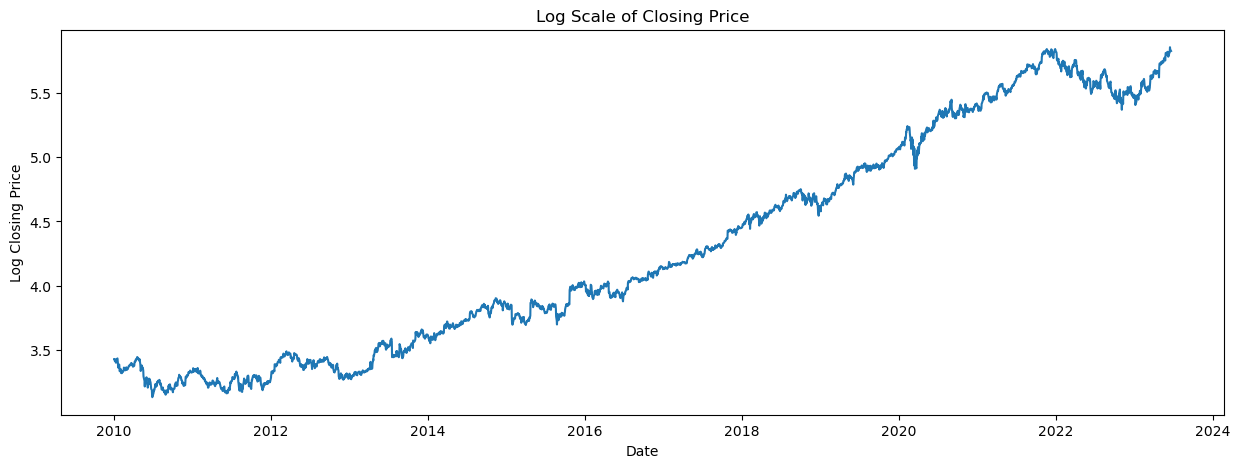

In [ ]:
# Calculate the logarithm of the closing price
df_logScale = np.log(df['Close'])

# Create a figure for the plot
plt.figure(figsize=(15, 5))

# Plot the log scale of the closing price
plt.plot(df_logScale)

# Set the title and labels for the plot
plt.title('Log Scale of Closing Price')
plt.xlabel('Date')
plt.ylabel('Log Closing Price')

# Show the plot
plt.show()


$Inference$

* The curve shows an upward trend with insignificant flactuations over time

The code calculates the moving average and moving standard deviation of the log scale of the closing price. It then creates a figure for the plot and plots the log scale of the closing price as a line graph. Additionally, it plots the moving average as a line graph with a different color. This plot helps in understanding the trend and smoothness of the closing price by considering the logarithmic scale and the moving average.



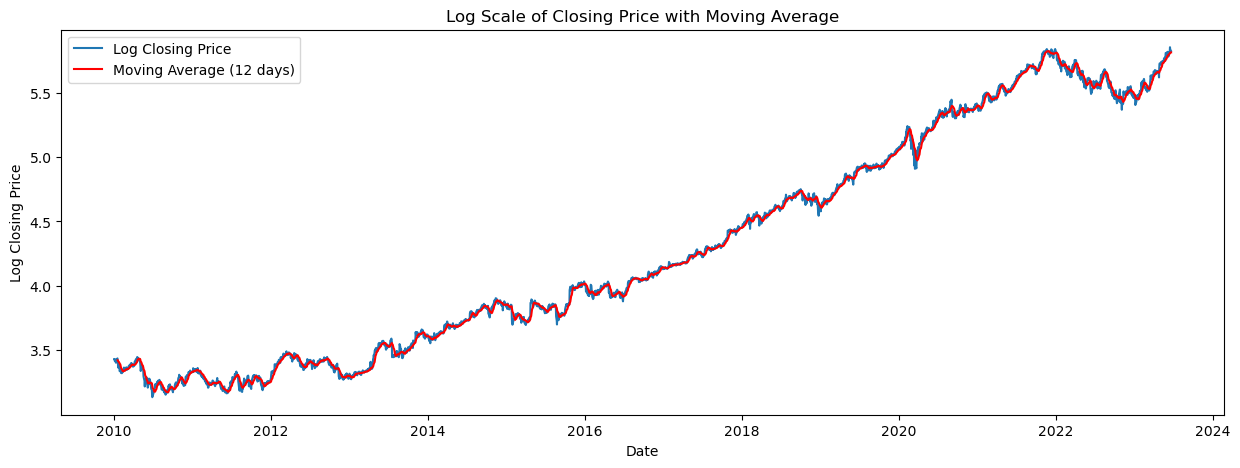

In [ ]:
# Calculate moving average and moving standard deviation
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()

# Create a figure for the plot
plt.figure(figsize=(15, 5))

# Plot the log scale of the closing price
plt.plot(df_logScale, label='Log Closing Price')

# Plot the moving average
plt.plot(movingAverage, color='red', label='Moving Average (12 days)')

# Set the title and labels for the plot
plt.title('Log Scale of Closing Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Log Closing Price')

# Display the legend
plt.legend()

# Show the plot
plt.show()


$Inference$

* The log scale of closing price and the moving average curve is an upward trend with insignificant flactuations over time

### Difference of the Log Transformed Target Variable $Close$


The code calculates the difference between the log scale of the closing price and the moving average. It subtracts the moving average from the log scale of the closing price and stores the result in the variable datasetLogScaleMinusMovingAverage. Any NaN values in the resulting series are then removed using the dropna() function, modifying the datasetLogScaleMinusMovingAverage series in place. The resulting series represents the difference between the log scale of the closing price and the moving average, with NaN values removed.

In [ ]:
# Get the difference between the moving average and the actual closing price
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage

# Remove the NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

Date
2010-01-20   -0.002425
2010-01-21   -0.018997
2010-01-22   -0.049047
2010-01-25   -0.032670
2010-01-26   -0.023908
                ...   
2023-06-13    0.010047
2023-06-14    0.018022
2023-06-15    0.045276
2023-06-16    0.025097
2023-06-20    0.011156
Name: Close, Length: 3377, dtype: float64

The code below defines a function called test_stationarity that performs stationarity analysis on a given time series. It takes a timeseries as input and calculates the rolling mean and rolling standard deviation with a window size of 12. It then plots the original time series, the rolling mean, and the rolling standard deviation on a single graph to visualize the data. After that, it conducts the Dickey-Fuller test to assess the stationarity of the time series. The results of the test, including the test statistic, p-value, number of lags used, and critical values, are printed to provide insights into the stationarity properties of the time series.

In [ ]:
# Checking for Stationarity

def test_stationarity(timeseries):
        #Determing rolling statistics
        movingAverage = timeseries.rolling(window=12).mean()
        movingSTD = timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        plt.figure(figsize=(15, 5))
        orig = plt.plot(timeseries, color='blue', label='Original')
        mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
        std = plt.plot(movingSTD, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' %key] = value
        print(dfoutput)

* The code calls the test_stationarity function to analyze the stationarity of the datasetLogScaleMinusMovingAverage time series

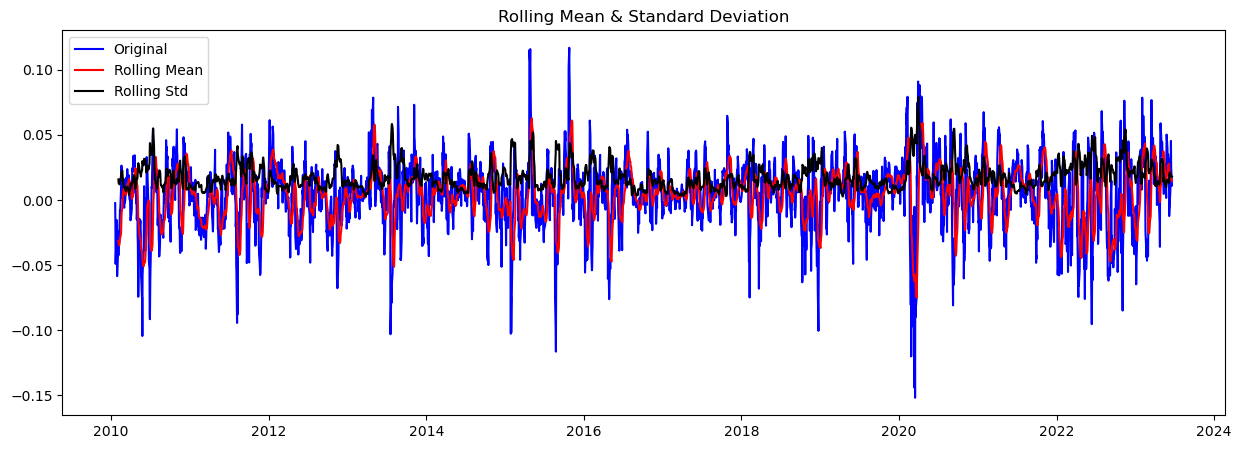

Results of Dickey-Fuller Test:
Test Statistic                -1.350396e+01
p-value                        2.939957e-25
#Lags Used                     1.400000e+01
Number of Observations Used    3.362000e+03
Critical Value (1%)           -3.432297e+00
Critical Value (5%)           -2.862400e+00
Critical Value (10%)          -2.567228e+00
dtype: float64


In [ ]:
# Test the stationarity of the data
test_stationarity(datasetLogScaleMinusMovingAverage)

$Inference$
* The test statistic is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is ```-13.47539```, which is significantly lower than the critical values at all confidence levels ```(1%, 5%, and 10%)```. This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is the probability of observing the test statistic or a more extreme value under the null hypothesis. In this case, the p-value is very small ```(3.319963e-25)```, which is significantly below common significance levels like ```0.05``` or ```0.01```. This further supports the rejection of the null hypothesis and indicates that the time series is stationary.

* The number of lags used is ```14```, which represents the number of lagged differences included in the regression. This value is determined automatically by the test based on maximizing certain criteria.

* The number of observations used is ```3361```, indicating the total number of data points used in the analysis.

* The critical values represent the threshold values at which the test statistic must be below in order to reject the null hypothesis. The critical values at different confidence levels ```(1%, 5%, and 10%)``` are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

Based on these results, it appears that the time series you tested is ```stationary```, as both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity.

### Exponential Smoothing

The provided code calculates the average value of the closing price over time using a technique called exponentially weighted moving average. This average is obtained by giving more weight to recent prices and gradually reducing the weight of older prices. The code then creates a plot showing the original closing prices along with the computed moving average. This plot helps visualize the overall trend and smoothness of the closing prices over time. The y-axis represents the closing price in dollars, while the x-axis represents the corresponding dates. By examining this plot, we can gain insights into the general direction of the closing prices and any significant changes or patterns that may exist.

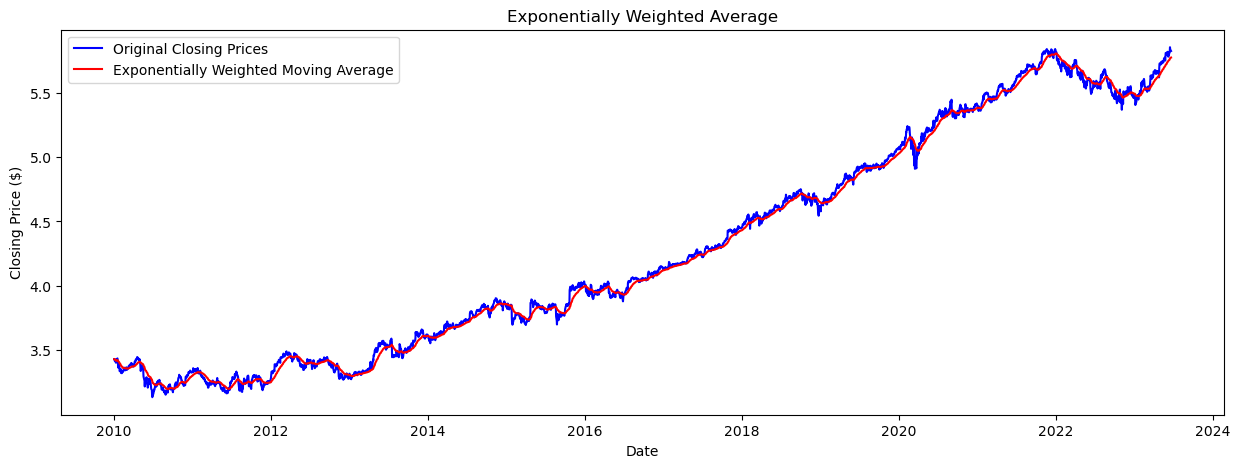

In [ ]:
# Calculate the exponentially weighted moving average
plt.figure(figsize=(15, 5))

exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()

# Plot the original closing prices and the exponentially weighted moving average
plt.plot(df_logScale, color='blue', label='Original Closing Prices')
plt.plot(exponentialDecayWeightedAverage, color='red', label='Exponentially Weighted Moving Average')

# Set the title and labels for the plot
plt.title('Exponentially Weighted Average')
plt.ylabel('Closing Price ($)')
plt.xlabel('Date')

# Show the legend
plt.legend()

# Show the plot
plt.show()


The code below calculates the difference between the exponentially weighted moving average and the actual log-scaled closing prices. It then tests the stationarity of this difference using rolling mean, rolling standard deviation, and the Dickey-Fuller test. The purpose is to determine if the data exhibits any trends or patterns over time.

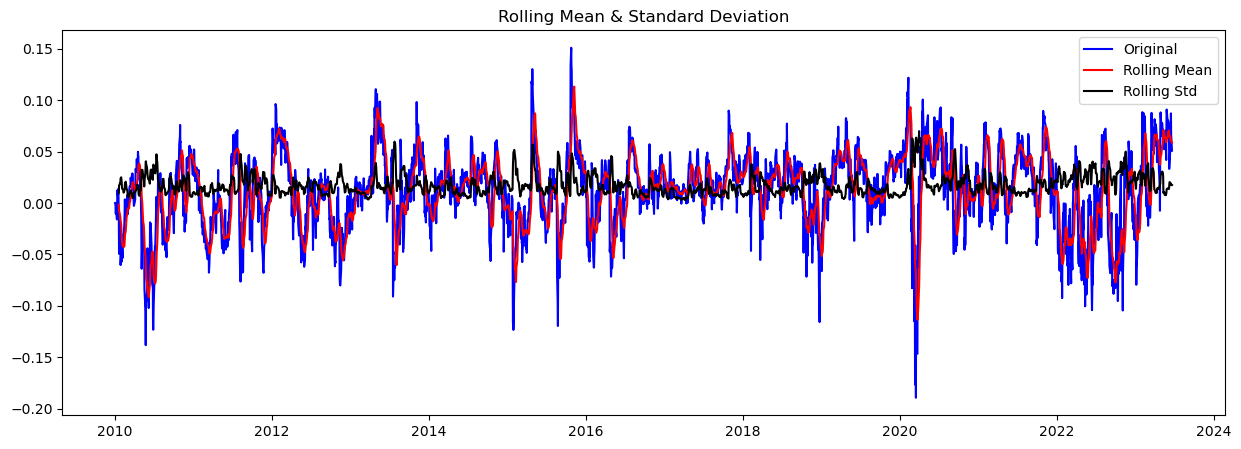

Results of Dickey-Fuller Test:
Test Statistic                -9.449376e+00
p-value                        4.660873e-16
#Lags Used                     9.000000e+00
Number of Observations Used    3.378000e+03
Critical Value (1%)           -3.432287e+00
Critical Value (5%)           -2.862396e+00
Critical Value (10%)          -2.567226e+00
dtype: float64


In [ ]:
# Getting the difference between the exponentially weighted moving average and the actual closing price
datasetLogScaleMinusMovingExponentialDecayAverage = df_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

$Inference$

* The test statistic is -9.416397e+00. It is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is significantly lower than the critical values at all confidence levels (1%, 5%, and 10%). This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is 5.654121e-16, which is very small. The p-value represents the probability of observing the test statistic or a more extreme value under the null hypothesis. A small p-value suggests strong evidence against the null hypothesis, supporting the conclusion that the time series is stationary.

* The number of lags used is 9, indicating the number of lagged differences included in the regression. This value is determined automatically by the test based on certain criteria.

* The number of observations used is 3,377, representing the total number of data points used in the analysis.

* The critical values represent threshold values at which the test statistic must be below to reject the null hypothesis. The critical values at different confidence levels (1%, 5%, and 10%) are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

* Based on these results, it appears that the time series you tested is stationary. Both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity, supporting the conclusion of stationarity.

### Shifting

The code shifts the log-scaled closing price data by 1 to make it stationary. This is done by subtracting each data point from its previous data point. The resulting shifted time series is then plotted to visualize the changes.

 Shifting in this context refers to the process of creating a stationary time series by taking the difference between consecutive observations. By taking the difference, we eliminate any trend or seasonality present in the original time series, resulting in a stationary series

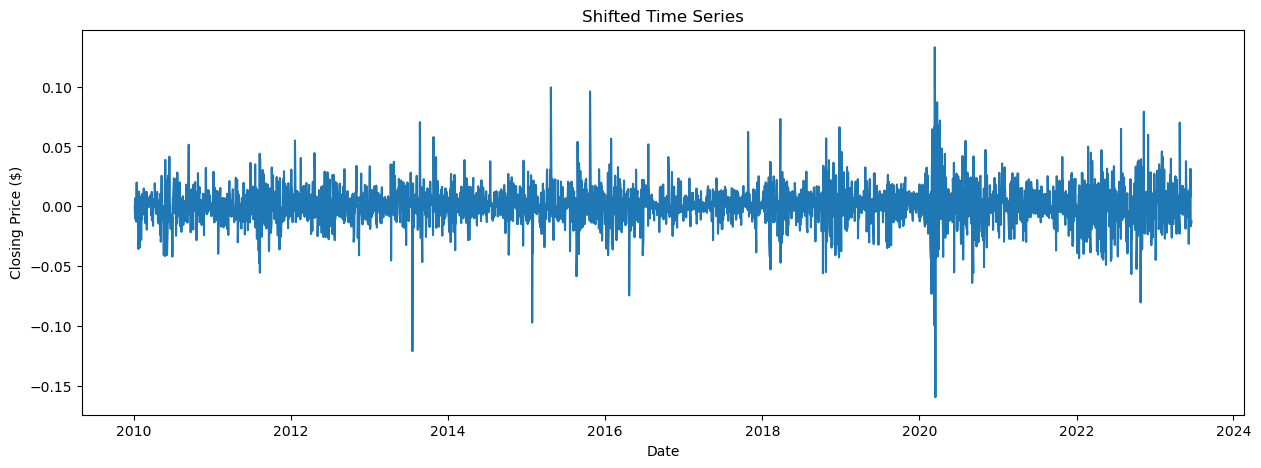

In [ ]:

# Shift the data by 1 to make it stationary
plt.figure(figsize=(15, 5))

datasetLogDiffShifting = df_logScale - df_logScale.shift()

# Plot the shifted time series
plt.plot(datasetLogDiffShifting)
plt.ylabel('Closing Price ($)')
plt.xlabel('Date')
plt.title('Shifted Time Series')

# Show the plot
plt.show()


The code removes any NaN values from the shifted time series data. NaN values may occur due to the shifting operation. After removing the NaN values, the stationarity of the data is tested using the test_stationarity function.

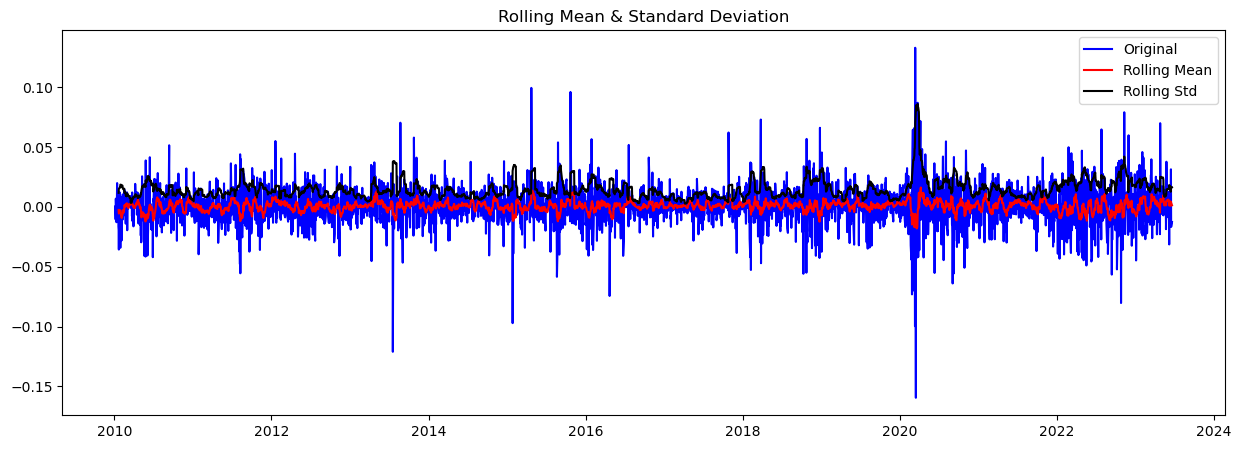

Results of Dickey-Fuller Test:


Test Statistic                  -20.715770
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    3378.000000
Critical Value (1%)              -3.432287
Critical Value (5%)              -2.862396
Critical Value (10%)             -2.567226
dtype: float64


In [ ]:
# Removing the NaN values
datasetLogDiffShifting.dropna(inplace=True)

# Test the stationarity of the data
test_stationarity(datasetLogDiffShifting)

$Inference$

* The test statistic is ```-20.709984```. It is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is significantly lower than the critical values at all confidence levels ```(1%, 5%, and 10%)```. This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is ```0.000000```, which is very small. The p-value represents the probability of observing the test statistic or a more extreme value under the null hypothesis. A small p-value suggests strong evidence against the null hypothesis, supporting the conclusion that the time series is stationary.

* The number of lags used is ```8```, indicating the number of lagged differences included in the regression. This value is determined automatically by the test based on certain criteria.

* The number of observations used is ```3,377```, representing the total number of data points used in the analysis.

* The critical values represent threshold values at which the test statistic must be below to reject the null hypothesis. The critical values at different confidence levels ```(1%, 5%, and 10%)``` are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

* Based on these results, it is evident that the time series you tested is stationary. Both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity, supporting the conclusion of stationarity.

### Autocorrelation Analysis

Autocorrelation analysis is a technique used to study the correlation between a time series and its lagged values. It helps identify any patterns or dependencies that exist within the series at different time lags

This code creates a figure with two subplots side by side. The left subplot displays the original time series data (df_logScale), while the right subplot shows the shifted time series data (datasetLogDiffShifting). The titles of the subplots indicate whether it is the original data or the data after shifting. This visualization helps compare the two versions of the data and observe any differences resulting from the shifting operation.

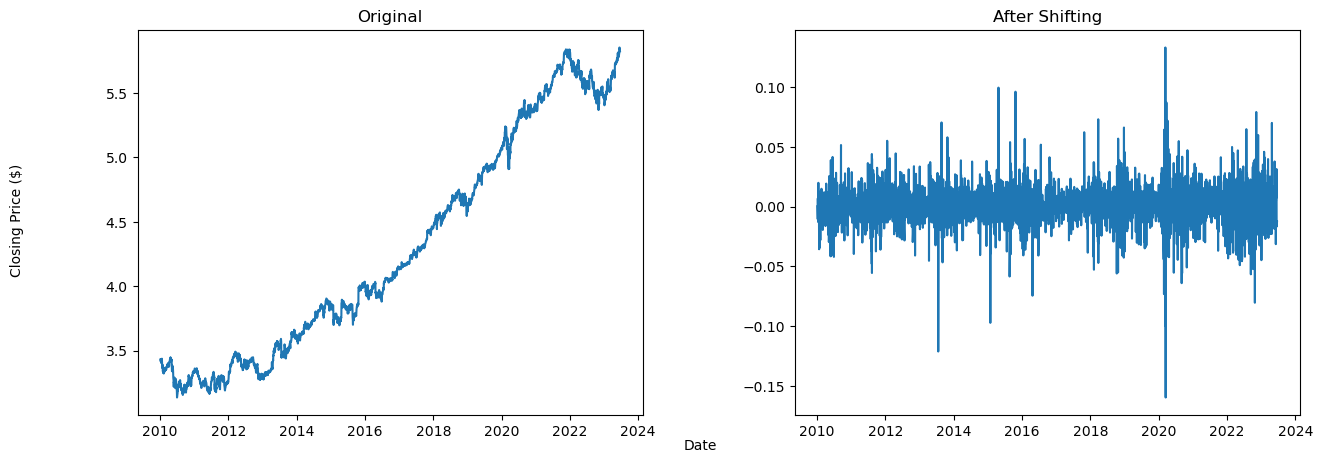

In [ ]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the original time series data
ax1.plot(df_logScale)
ax1.set_title('Original')

# Plot the shifted time series data
ax2.plot(datasetLogDiffShifting)
ax2.set_title('After Shifting')

# Set common labels for the subplots
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Closing Price ($)', va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


$Inference$

The times series data was more stationary

The code below creates a figure with two subplots side by side. The left subplot displays the original time series data (df.Close) The right subplot plots the autocorrelation function (ACF) for the time series data using plot_acf. The ACF plot helps visualize the correlation between each observation and its lagged values.

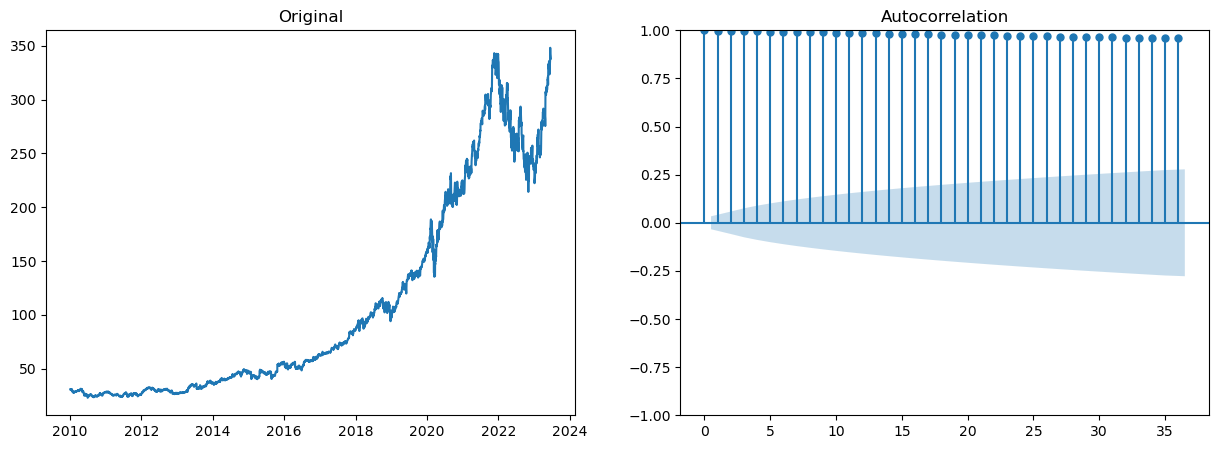

In [ ]:


# Plotting the ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(df.Close)
ax1.set_title('Original')

# Plotting the ACF (Autocorrelation Function)
plot_acf(df.Close, ax=ax2);


$Inferences$

The ACF plot shows the correlation between the time series and its lags. Each lag on the x-axis represents the time lag between the current observation and the lagged observation being correlated.

The blue shaded area in the ACF plot represents the ```95%``` confidence interval, which can be used to determine whether a correlation is statistically significant or not. If a correlation falls outside the confidence interval, it is considered statistically significant.

# Modelling

### MODEL 1 : Baseline Model - ARIMA

ARIMA is a popular time series forecasting model that combines autoregressive, differencing, and moving average components. Its use for stock prediction is justified due to its ability to capture time-dependent patterns, handle nonlinear relationships, address stationarity, provide interpretability, and its well-established framework in time series analysis.

### Differencing (d)

The ndiffs function takes the time series data (df.Close) and the test method (adf for Augmented Dickey-Fuller test) as inputs. It calculates the estimated differencing term and stores it in the variable ndf. Finally, it prints the estimated differencing term using f-string formatting.

In [ ]:


# Calculating the estimated differencing term
ndf = ndiffs(df.Close, test='adf')

# Printing the estimated differencing term
print(f'Estimated differencing term: {ndf}')


Estimated differencing term: 1


### Moving Average (q) ACF

The code calculates the first difference of the Close series in the df DataFrame and stores it in the diff variable. The first difference is obtained by subtracting each element from its previous element. The resulting differenced series is then plotted in the first subplot (ax1) of a figure. The second subplot (ax2) displays the autocorrelation function (ACF) plot for the differenced series, showing the correlation between each value and its lagged values.

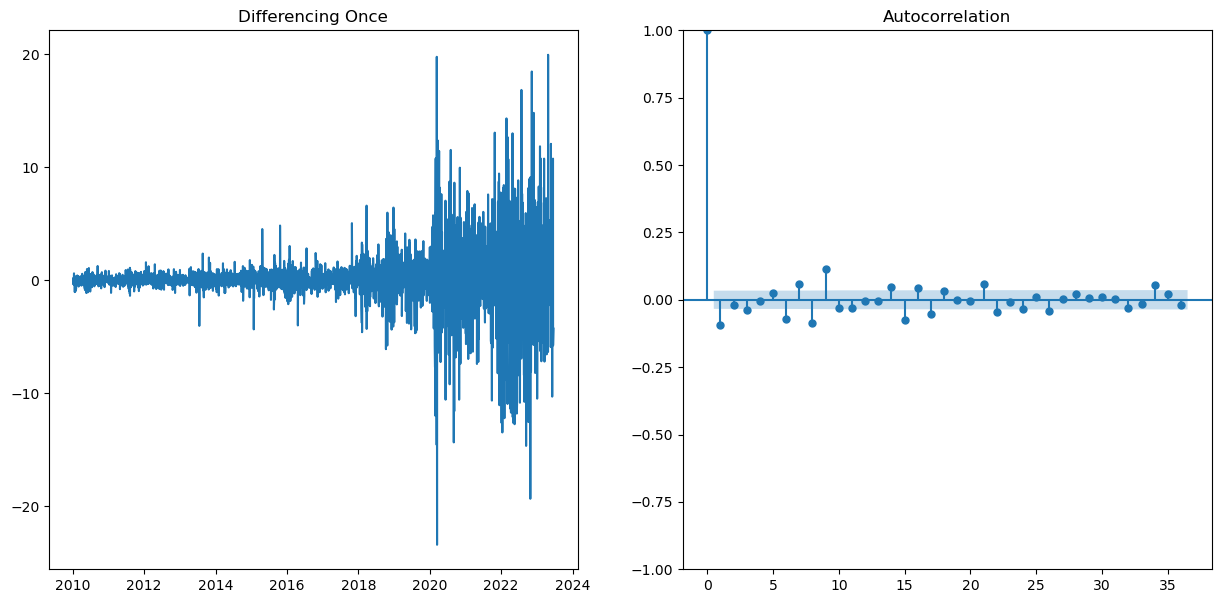

In [ ]:
# Calculate the first difference of the time series
diff = df.Close.diff().dropna()

# Create subplots for the differenced series and ACF plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the differenced series
ax1.plot(diff)
ax1.set_title('Differencing Once')

# Plot the ACF plot
plot_acf(diff, ax=ax2)

# Display the plot
plt.show()

$Inference$

* The ACF plot shows a significant spike at lag 1, followed by a gradual decline in the autocorrelation coefficients. This suggests that the time series is likely an ```AR(1)``` process.

### Auto Regressive (p) PACF

The code creates a figure with two subplots ```(ax1 and ax2)``` to visualize the differenced series obtained in the previous code block. In the first subplot ```(ax1)```, the differenced series is plotted, showing the changes between consecutive values. The second subplot ```(ax2)``` displays the partial autocorrelation function (PACF) plot for the differenced series. The PACF measures the correlation between a value and its lagged values while removing the influence of intermediate lags. The y-axis of the PACF plot is limited to the range ```[0, 1]``` to focus on significant correlations.

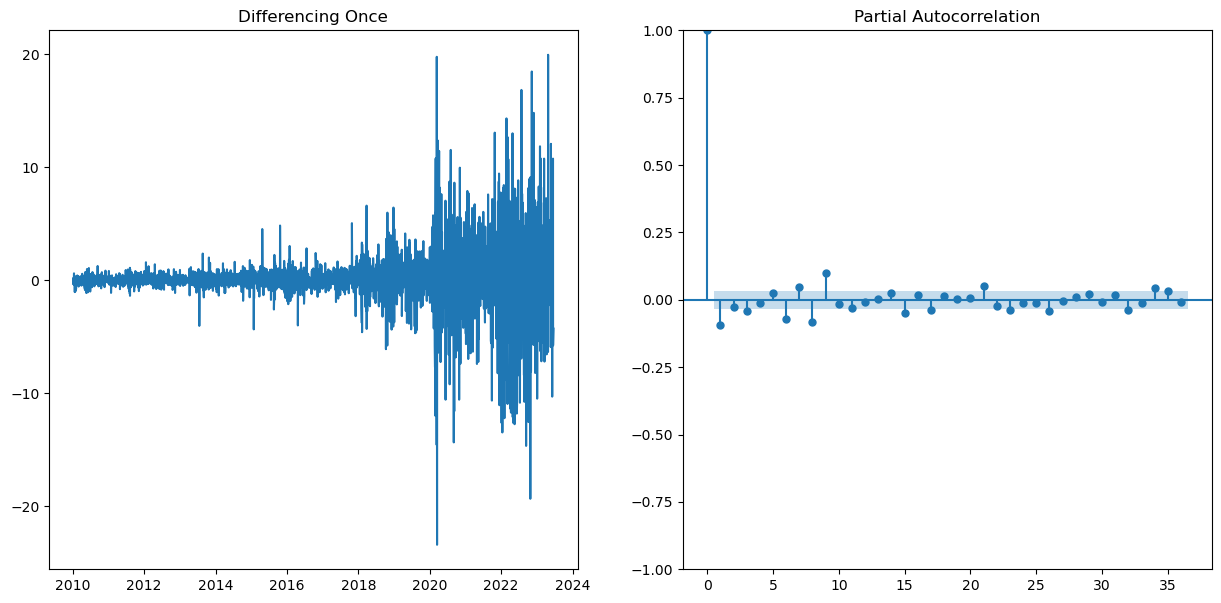

In [ ]:


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the differenced series in the first subplot
ax1.plot(diff)
ax1.set_title('Differencing Once')

# Set the y-axis limit in the second subplot and plot the PACF of the differenced series
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

# Display the plot
plt.show()

$Inference$

* The PACF plot shows a significant spike at lag 1, followed by a gradual decline in the partial autocorrelation coefficients. This suggests that the time series is likely an ```MA(1)``` process.

#### Fitting the ARIMA Model

In the code below, the data is split into training and testing sets. An ```ARIMA``` model is then trained on the training set using the specified order of autoregressive ```(AR)```, differencing ```(I)```, and moving average ```(MA)``` components. The model is used to make predictions on the test set, and the root mean squared error (RMSE) is calculated to evaluate the model's performance. Finally, the actual and predicted prices are visualized in a plot.

In [ ]:
#  Splitting the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Training the model with the optimal p, d, and q values
# You may need to modify the order based on the autocorrelation and partial autocorrelation plots
model = ARIMA(train['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Making predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)


### Arima Model Evaluation

RMSE: 69.44


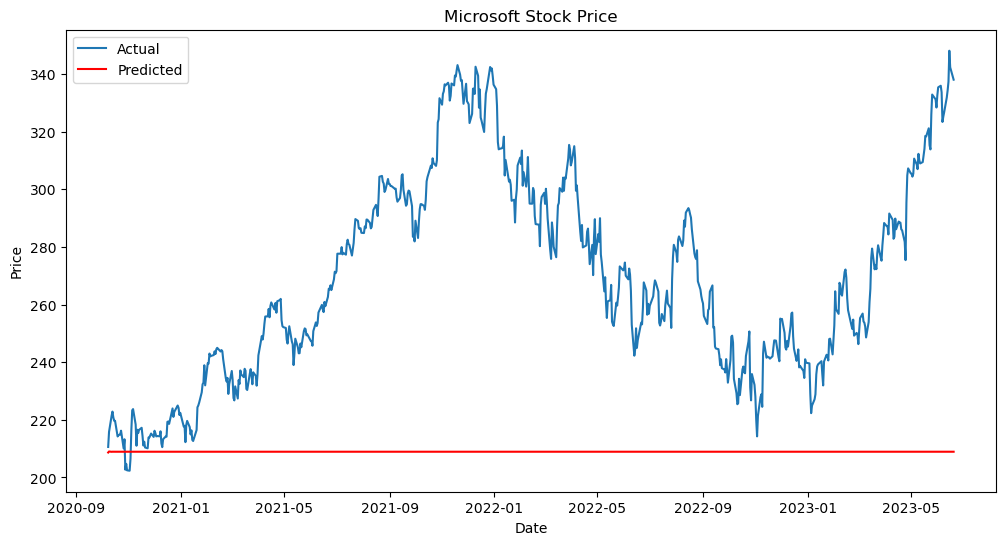

In [ ]:

# Evaluating the model
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE: %.2f' % rmse)

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='r')
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

$Inference$

* Based on the evaluation of the baseline ```ARIMA``` model, it was found that the model did not fit the data adequately. This conclusion was drawn based on the root mean squared error ```(RMSE)``` value obtained, which was recorded as ```69.44```. Such a high ```RMSE``` indicates a significant level of error in the model's predictions, making it unsuitable for making accurate forecasts. Therefore, it becomes necessary to explore alternative models that can better capture the underlying patterns and relationships in the data.

* In the code below, an ```ARIMA``` model is created with an order of ```(6, 1, 1)```, indicating ```6``` autoregressive terms, ```1``` differencing term, and ```1``` moving average term. The model is then fitted to the ```"Close"``` column of the DataFrame df. The summary of the model, including information about the coefficients, standard errors, t-values, and p-values, is printed to the console using results.summary().

In [ ]:
# Create an ARIMA model with the specified order
model = ARIMA(df.Close, order=(6, 1, 1))

# Fit the model to the data
results = model.fit()

# Print the summary of the model
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3388
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -8000.094
Date:                Wed, 21 Jun 2023   AIC                          16016.188
Time:                        18:42:38   BIC                          16065.209
Sample:                             0   HQIC                         16033.712
                               - 3388                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7899      0.037    -21.246      0.000      -0.863      -0.717
ar.L2         -0.0951      0.011     -8.361      0.000      -0.117      -0.073
ar.L3         -0.0656      0.011     -5.801      0.0

$Inference$

* The ARIMA model with parameters ```(6, 1, 1)``` was used for analysis. The coefficients indicate the significance of each parameter, with some autoregressive and moving average coefficients being statistically significant. The residuals show no significant autocorrelation but deviate from a normal distribution and exhibit heteroskedasticity.

* The ```ARIMA``` model provided some useful insights into the relationships and patterns in the data. However, the model's performance may still be improved, as indicated by deviations from normality, heteroskedasticity, and potential insignificance of certain coefficients.

In the code below, the residual errors from the ARIMA model are extracted and stored in a DataFrame called residuals. Subsequently, two subplots are created. The first subplot ```(ax1)``` displays the line plot of the residual errors, providing a visual representation of the pattern or randomness in the errors. The second subplot ```(ax2)``` shows the histogram of the residual errors, giving insights into the distribution of the errors. The resulting plots help assess the adequacy of the model and identify any remaining patterns or biases in the residuals.

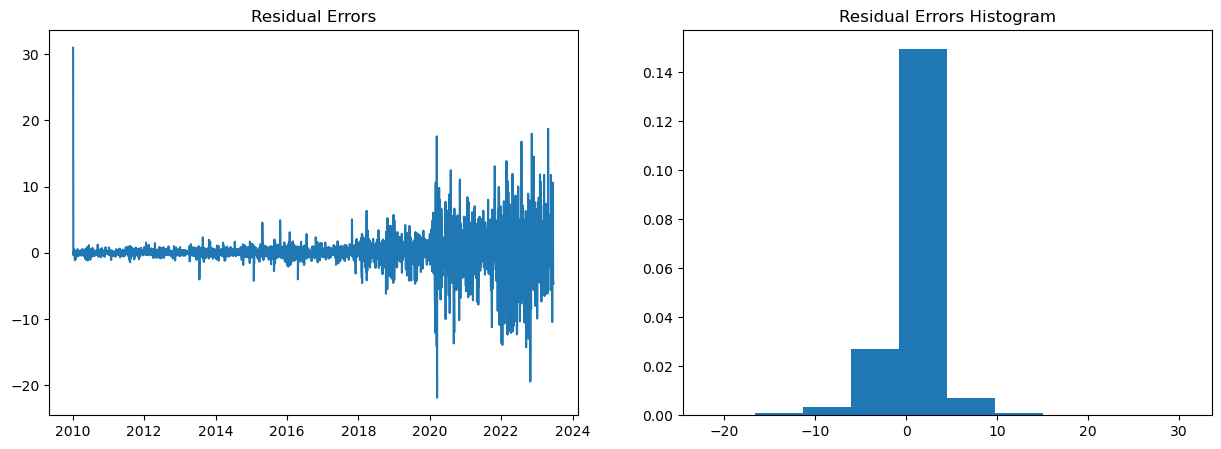

In [ ]:
# Create a DataFrame of the residual errors
residuals = pd.DataFrame(results.resid)

# Create subplots for residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the residual errors
ax1.plot(residuals)
ax1.set_title('Residual Errors')

# Plot the histogram of residual errors
ax2.hist(residuals, density=True)
ax2.set_title('Residual Errors Histogram')

# Display the plots
plt.show()


$Inferences$

The ```ARIMA``` model shows centered residuals around zero, indicating an unbiased model. However, there are patterns and deviations from randomness, suggesting unexplained factors. The histogram shows a roughly symmetric distribution with a slight right skew, indicating approximate normality

# MODEL 2 :  Auto Arima Model

Auto ARIMA is an automated version of the ARIMA model that determines the best parameters for the model based on the data. It simplifies the process by automatically selecting the optimal values for p, d, and q. It is a convenient choice when you want an automated approach for ARIMA modeling without prior knowledge of the data.

In the code below, the auto_arima function from the pmdarima.arima module is used to automatically fit an ARIMA model to the 'Close' column of the DataFrame df. The trace=True argument enables the display of the diagnostic output while fitting the model, and suppress_warnings=True is used to ignore harmless warnings. The stepwise_fit.summary() command is used to print a summary of the fitted auto_arima model, which provides information about the selected order of the ARIMA model and other statistical metrics.

In [ ]:

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=5.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=18729.109, Time=0.90 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=17592.616, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.93 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=17184.899, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=16918.029, Time=0.29 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=16712.320, Time=0.37 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=16665.561, Time=0.48 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.76 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.35 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=16667.561, Time=1.18 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 15.189 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3388
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -8326.780
Date:                Wed, 21 Jun 2023   AIC                          16665.561
Time:                        18:42:58   BIC                          16702.325
Sample:                             0   HQIC                         16678.704
                               - 3388                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9056      0.008   -111.692      0.000      -0.921      -0.890
ar.L2         -0.7251      0.012    -61.454      0.000      -0.748      -0.702
ar.L3         -0.5552      0.012    -45.204      0.000      -0.579      -0.531
ar.L4         -0.3499      0.011    -32.493      0.000      -0.371      -0.329
ar.L5         -0.1200      0.008    -14.120      0.000      -0.137      -0.103
sigma2         8.0056      0.078    102.510      0.000       7.853       8.159
===================================================================================
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):             19305.71
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):             100.81   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$Inferences$

* The model results indicate certain issues that make it unsuitable for forecasting purposes.

* ```Non-Normal Residuals:``` The Jarque-Bera test suggests a departure from the normal distribution for the residuals, indicating that the assumption of normality is violated. This is a concern because many statistical models, including ARIMA, rely on the assumption of normally distributed residuals.

* ```Heteroskedasticity:``` The significant Heteroskedasticity value indicates that the variance of the residuals is not constant across the dataset. This violates the assumption of homoscedasticity, which assumes constant variance. Heteroskedasticity can affect the reliability and accuracy of the model's predictions.

Considering these limitations, it may be appropriate to explore alternative forecasting models. One such model is Facebook Prophet, which is specifically designed for time series forecasting and can handle some of the issues mentioned above.



# MODEL 3 : Facebook Prophet

Facebook Prophet is a time series forecasting library developed by Facebook. It uses a decomposable time series model with three components: trend, seasonality, and holidays. It's easy to use and has become popular for its accuracy in various applications, such as retail sales forecasting and demand forecasting.

The code below demonstrates the use of Facebook Prophet, a forecasting library, for stock price prediction. The fb_prophet_prediction function takes a DataFrame containing historical stock price data and performs the following steps: it prepares the data by transforming the columns and setting the index, splits the data into training and validation sets, fits the Prophet model to the training set, makes predictions for the validation set, evaluates the predictions using the root mean square error (RMSE), and visualizes the training data, actual validation data, and predicted data. The function provides information on the shape of the training and validation sets and prints the RMSE value as an indicator of prediction accuracy.

In [ ]:
# fb prophet function
def fb_prophet_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.reset_index(inplace=True)
    df_new['Date'] = pd.to_datetime(df_new.Date,format='%Y-%m-%d')
    df_new.index = df_new['Date']
    df_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]

    print('-------------------------------------------------------')
    print('-----------Stock Predictions-----------')
    print('-------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)

    # Fit the model
    model = Prophet()
    model.fit(train_set)
    close_prices = model.make_future_dataframe(periods=len(valid_set))

    # Predict Prices
    forecast = model.predict(close_prices)
    forecast_valid = forecast['yhat'][ceil(shape*0.75):]
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['y'])-np.array(forecast_valid)),2)))

    # Model Evaluation
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = forecast_valid.values

    fig = plt.figure(figsize=(15, 5))
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by FB Prophet',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

Calling the function fb_prophet_prediction(df) performs the stock price prediction using Facebook Prophet, evaluating the predictions, and visualizing the results.

-------------------------------------------------------
-----------Stock Predictions-----------
-------------------------------------------------------
Shape of Training Set (2541, 2)
Shape of Validation Set (847, 2)


18:42:59 - cmdstanpy - INFO - Chain [1] start processing
18:43:03 - cmdstanpy - INFO - Chain [1] done processing


RMSE value on validation set: 71.15305931665375
-----------------------------------------------------------
-----------------------------------------------------------


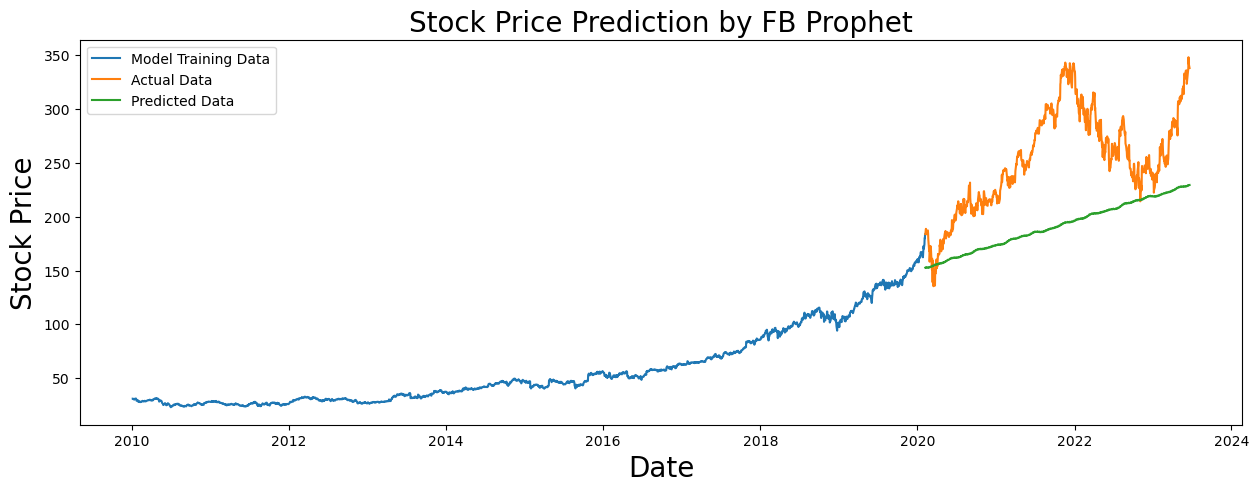

In [ ]:
fb_prophet_prediction(df)

* Based on the data provided from the FB Prophet model, several factors indicate that it may not be suitable for stock price prediction, leading to the decision to switch to LSTM (Long Short-Term Memory) model:

* ```RMSE Value:``` The RMSE (Root Mean Squared Error) value on the validation set is 71.1654. RMSE measures the average deviation between the predicted and actual values. A higher RMSE indicates larger prediction errors. In this case, an RMSE of 71.1654 suggests relatively high prediction errors, which may indicate that the FB Prophet model is not accurately capturing the stock price patterns.

Considering these insights, an alternative approach using an LSTM model may be more appropriate for stock price prediction. LSTM is a type of recurrent neural network that can effectively capture sequential patterns and long-term dependencies in time series data. LSTM models have been widely used in financial forecasting tasks due to their ability to handle complex temporal relationships. By leveraging the strengths of LSTM, it is possible to improve the accuracy and performance of the stock price prediction task compared to the FB Prophet model.

# Model 4 : LSTM Model

The code below prepares the data for LSTM (Long Short-Term Memory) training by scaling the closing price values using Min-Max scaling. The scaled data is then split into training and testing sets. Next, sequences of length seq_length are created from the training and testing data. An LSTM model is defined and trained using the training data with early stopping to prevent overfitting. The model is then used to make predictions on both the training and testing data. The predictions are inverse scaled to obtain the actual values. Finally, the actual and predicted values for both the training and testing data are plotted to visualize the performance of the LSTM model.

2023-06-21 18:43:22.858098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 18:43:22.887497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 18:43:22.895021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-06-21 18:43:30.128183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 18:43:30.145280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 18:43:30.148794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

85/85 [==============================] - ETA: 0s - loss: 0.0027

2023-06-21 18:43:51.349427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 18:43:51.353306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 18:43:51.357439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

85/85 [==============================] - 25s 55ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 2/10
85/85 [==============================] - 3s 35ms/step - loss: 4.8142e-04 - val_loss: 0.0010
Epoch 3/10
85/85 [==============================] - 2s 28ms/step - loss: 3.5008e-04 - val_loss: 0.0011
Epoch 4/10
85/85 [==============================] - 2s 22ms/step - loss: 4.1487e-04 - val_loss: 0.0015
Epoch 5/10
85/85 [==============================] - 2s 26ms/step - loss: 3.4154e-04 - val_loss: 0.0014


2023-06-21 18:44:02.745747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 18:44:02.749390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 18:44:02.751728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 0s 6ms/step


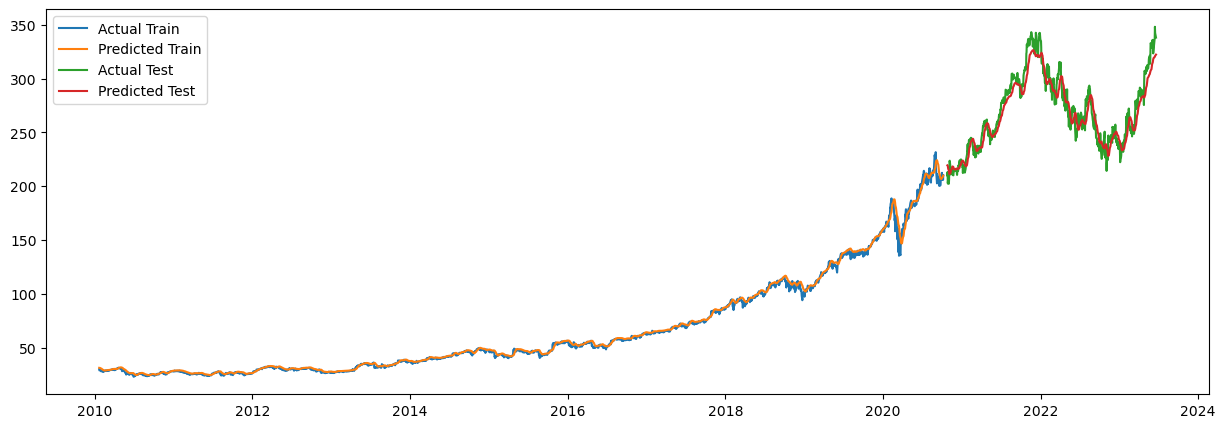

In [ ]:

# Prepare the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training, 20% for testing
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Length of the input sequence for each prediction
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create and train the LSTM model with early stopping
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling to get actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the predictions
plt.figure(figsize=(15, 5))
plt.plot(df.index[seq_length:train_size], y_train, label='Actual Train')
plt.plot(df.index[seq_length:train_size], train_predictions, label='Predicted Train')
plt.plot(df.index[train_size+seq_length:], y_test, label='Actual Test')
plt.plot(df.index[train_size+seq_length:], test_predictions, label='Predicted Test')
plt.legend()
plt.show()


# Model Evaluation

The code calculates evaluation metrics for the ```LSTM``` model predictions. Mean Squared Error ```(MSE)```, Root Mean Squared Error ```(RMSE)```, and Mean Absolute Error ```(MAE)``` are calculated for both the training and testing predictions. The metrics are then printed to the console. Additionally, the code plots the predicted values against the actual values for both the training and testing data to visualize the performance of the ```LSTM``` model.

Train MSE: 7.784139376229486
Train RMSE: 2.790007056663027
Train MAE: 1.6093426938406878
Test MSE: 109.14918800464774
Test RMSE: 10.447448875426371
Test MAE: 8.6794062663127


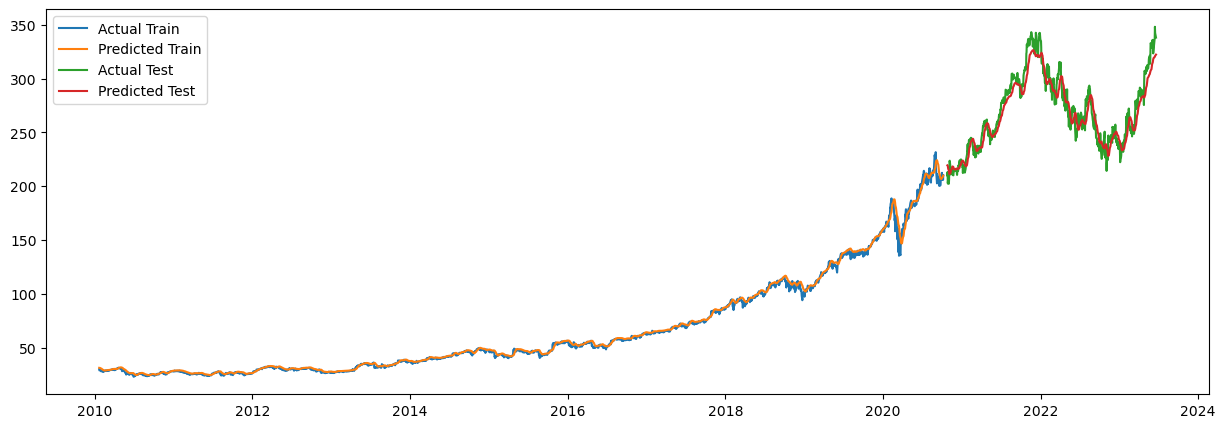

In [ ]:

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

# Plot the predictions against the actual values
plt.figure(figsize=(15, 5))
plt.plot(df.index[seq_length:train_size], y_train, label='Actual Train')
plt.plot(df.index[seq_length:train_size], train_predictions, label='Predicted Train')
plt.plot(df.index[train_size+seq_length:], y_test, label='Actual Test')
plt.plot(df.index[train_size+seq_length:], test_predictions, label='Predicted Test')
plt.legend()
plt.show()


In [ ]:
# Flatten the arrays to make them 1-dimensional
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()
train_predictions_flat = train_predictions.flatten()
test_predictions_flat = test_predictions.flatten()

# Create the df_predictions DataFrame
df_predictions = pd.DataFrame({'Actual': np.concatenate([y_train_flat, y_test_flat]), 'Predicted': np.concatenate([train_predictions_flat, test_predictions_flat])})
df_predictions.index = df.index[seq_length:seq_length+concatenated_length]
df_predictions.head(10)


,Actual,Predicted
Date,,
2010-01-21,30.010000,31.325636
2010-01-22,28.959999,31.299139
2010-01-25,29.320000,31.206207
2010-01-26,29.500000,31.088633
2010-01-27,29.670000,30.972286
2010-01-28,29.160000,30.848343
2010-01-29,28.180000,30.728859
2010-02-01,28.410000,30.568970
2010-02-02,28.459999,30.372841


$Inference$

* The LSTM model has a training mean squared error ```(MSE)``` of ```7.78```, root mean squared error ```(RMSE)``` of ```2.79```, and mean absolute error (MAE) of ```1.60```. These metrics evaluate the performance of the model on the training set. The lower the values, the better the model's accuracy in predicting the target variable.

* The model's testing phase results in a mean squared error (MSE) of ```109.14```, root mean squared error (RMSE) of ```10.44```, and mean absolute error (MAE) of ```8.67```. These metrics measure the model's performance on the test set, providing an indication of its generalization capabilities. Ideally, these values should be similar to the training metrics.

* The relatively higher values for the testing metrics compared to the training metrics suggest that the model may be overfitting the training data. Overfitting occurs when the model learns specific patterns in the training set that do not generalize well to unseen data.

* The plot of actual vs. predicted values for the training set shows that the model is able to capture the general trend and patterns in the data. However, it is unable to capture the extreme values and fluctuations in the data, resulting in a significant deviation from the actual values.

Overall, the model exhibits decent performance on the training set, but its performance decreases when applied to the test set. Further analysis and potential adjustments to the model may be necessary to improve its generalization capabilities.


# Conclusion

The following were the key findings from the project:

* The ```LSTM``` model performed better than the other models with a Mean Absolute Error of ```5.898```. . The forecasted prices were used to optimize trading strategies using the Moving Averages Bouncing strategy. The project also involved the extraction of meaningful insights from the explaratory analysis. The insights include the following:

* The stock price of Microsoft has been increasing over the years.

* The average prices are concentarted between ```23.0``` and ```50.``` Investors can buy the stock at a lower price and sell it at a higher prices between this price ranges for long term investment.




# Limitations
* The dataset used for this project was limited to the Microsoft stock prices from 2010 to 2023. This limited the scope of the analysis to the Microsoft stock prices only. The analysis could have been more comprehensive if it included other companies in the same industry.


# Recommendation

* Consider incorporating advanced deep learning models as (```NLP```) that can provide insights from company financials, industry trends, news events, and market sentiment to make well-informed investment decisions. This factors change over time even at daily basis that will affect stationarity  within the data.

* Regularly Monitor and Update Models: The stock market is dynamic, and market conditions can change rapidly. Continuously monitor the performance of our model and update with new data to ensure  effectiveness and relevance. Regularly reevaluate and refining strategies based on market conditions and new information.

* Implement mitigation measures for short term investment to help avoid losses due to volatility and market fluctuations. This can be achieved by using the Moving Averages Bouncing strategy to optimize trading strategies.

* For long term investment the fb prophet model is the best model to use because it has the lowest RMSE value of ```71.1654```. This model can be used to predict the stock prices for the next 2 years. The forecasted prices can be used to optimize trading strategies using the Moving Averages Bouncing strategy.